In [5]:
from TSP_MultiAgent_QUBO_Methods import *
import numpy as np

# Parameters

distances = np.loadtxt("./data/matriz-rutas-granada")
N = 5
L = 2
p_list = [3 for i in range(L)]

startNodes = [0, 1]
endNodes = [3, 4]

reduced_distances = distances[:N,:N]/np.max(distances[:N,:N])
distances_QUBO = convertCostMatrixToQUBORepresentation(reduced_distances, p_list, L)

Naive solution: [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
Cost of naive solution: 2.5940431542080598


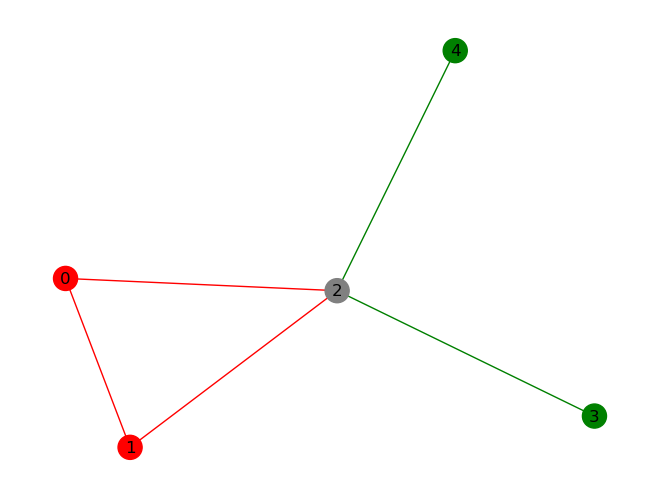

In [6]:
# Calculate cost of naive solution

naive_solution = generate_valid_naive_solution(N,p_list, startNodes, endNodes, L)
cost_naive_solution = calculate_cost(naive_solution, distances_QUBO)
check_solution(naive_solution, N, p_list, startNodes, endNodes, L)

print("Naive solution:", naive_solution)
print("Cost of naive solution:", cost_naive_solution)

draw_solution(naive_solution, reduced_distances, p_list, startNodes, endNodes, L)

lambdas: [1.         9.99999927 0.         9.99998472 0.         0.        ]


The solution is incorrect
Constraint 2 not fulfilled for line 0.
Constraint 4 not fulfilled for line 0.
Constraint 5 not fulfilled for line 0.
Constraint 2 not fulfilled for line 1.
Constraint 4 not fulfilled for line 1.
Constraint 5 not fulfilled for line 1.
Global constraint not fulfilled: Some stops are not visited at least once.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0]


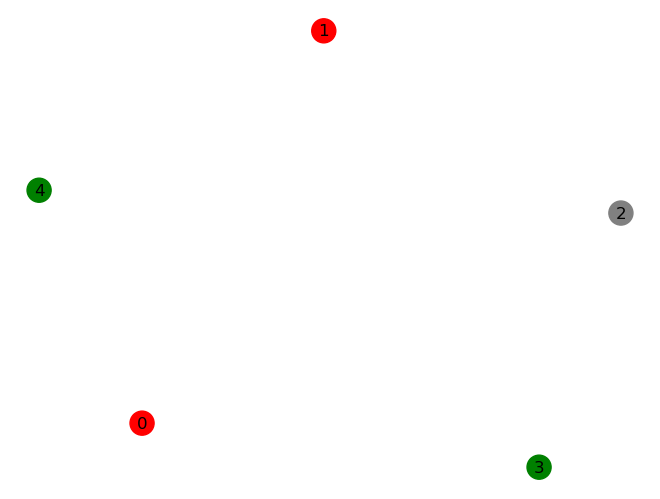

In [10]:
# Compute the solution using the optimized lambdas and the Dwave simulator

methods = [
    "Nelder-Mead",  # Algoritmo simplex (no requiere derivadas)
    "Powell",       # Algoritmo de búsqueda direccional (sin derivadas)
    "L-BFGS-B",     # Variante limitada de BFGS (acepta restricciones de caja)
    "TNC",          # Algoritmo de Newton truncado (adecuado para problemas grandes)
    "COBYLA",       # Optimización secuencial por aproximaciones cuadráticas
    "SLSQP"         # Programación cuadrática secuencial
]

method = methods[2]
iterations = 200
initial_solution = naive_solution
lambdas = [1.0 for _ in range(6)]

for i in range(iterations):
    lambdas = optimize_lambdas(reduced_distances, p_list, startNodes, endNodes, method, initial_solution, lambdas)
    Q_matrix, _ = create_QUBO_matrix(reduced_distances, p_list, startNodes, endNodes, L, lambdas)
    initial_solution, _ = solve_qubo_with_Dwave(Q_matrix)

best_solution = initial_solution

print("lambdas:", lambdas)
print("\n") 

best_solution_cost = calculate_cost(best_solution, distances_QUBO)

if check_solution_return(best_solution, N, p_list, startNodes, endNodes, L):
    print("The solution is correct")
    print("Cost of the solution:", best_solution_cost)
    print("\n")
    draw_solution(best_solution, reduced_distances, p_list, startNodes, endNodes, L)

    if is_symmetric(Q_matrix, tol=1):
        print("\n Q_matrix is symmetric")
        np.savetxt("./data/Q_matrix_TSP", Q_matrix)

else:
    print("The solution is incorrect")
    check_solution(best_solution, N, p_list, startNodes, endNodes, L)
    draw_solution(best_solution, reduced_distances, p_list, startNodes, endNodes, L)
    print(best_solution)